In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [196]:
df = pd.read_csv("houseprices.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [197]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1143,1144,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,80000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
343,344,120,RL,63.0,8849,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,266000
1067,1068,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,167900
532,533,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500


In [198]:
df = df.select_dtypes(include=['number'])
df = df.fillna(df.median(numeric_only=True))

<Axes: >

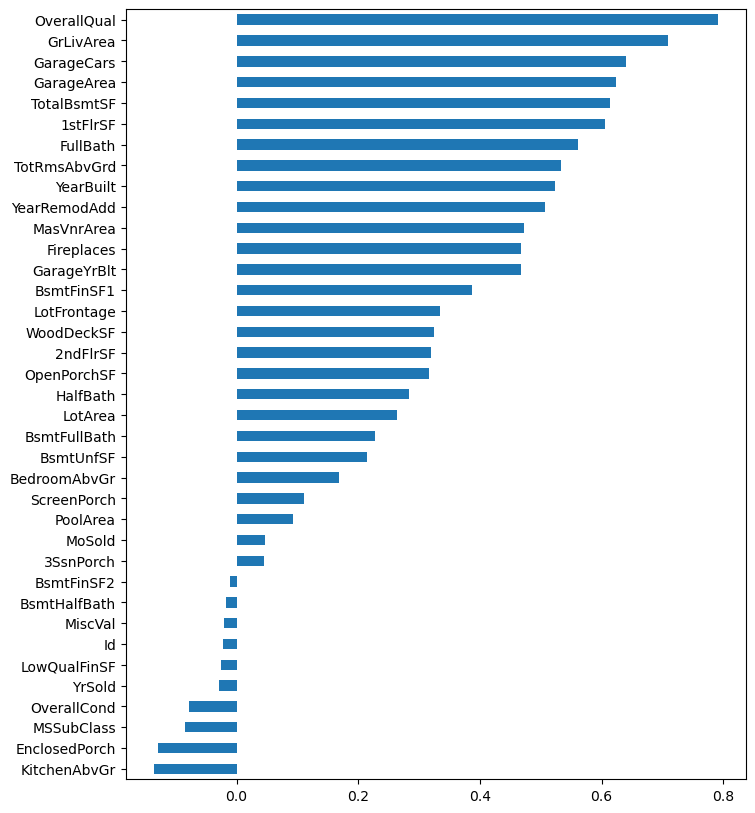

In [199]:
corr = df.corr(numeric_only=True)['SalePrice'].drop('SalePrice').sort_values()

corr.plot(kind="barh", figsize=(8,10))

In [206]:
y = np.array(df['SalePrice'])
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
#X = df.drop('SalePrice', axis=1)
#X = df.drop(columns=['SalePrice', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'])

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [231]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [232]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [233]:
regr = Lasso(alpha=1.0)

regr.fit(X_train_poly, y_train)

y_pred = regr.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)
print("Overall score:", regr.score(X_test_poly, y_test))

Root Mean Square Error (RMSE): 34329.10761340027
Overall score: 0.8463575605913385


In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_curve(X_orig, y_orig, model, scaler, poly, target_feature):
    x_min, x_max = X_orig[target_feature].min(), X_orig[target_feature].max()
    x_grid = np.linspace(x_min, x_max, 300)

    grid_df = pd.DataFrame([X_orig.mean().values] * 300, columns=X_orig.columns)
    
    grid_df[target_feature] = x_grid

    grid_scaled = scaler.transform(grid_df) 
    grid_poly = poly.transform(grid_scaled)
    y_pred_grid = model.predict(grid_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_orig[target_feature], y_orig, color='red', alpha=0.4, label='Actual Data')
    plt.plot(x_grid, y_pred_grid, color='blue', linewidth=3, label='Model Prediction')
    
    plt.title(f"Lasso Polynomial Fit: {target_feature} vs Price")
    plt.xlabel(target_feature)
    plt.ylabel("SalePrice")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

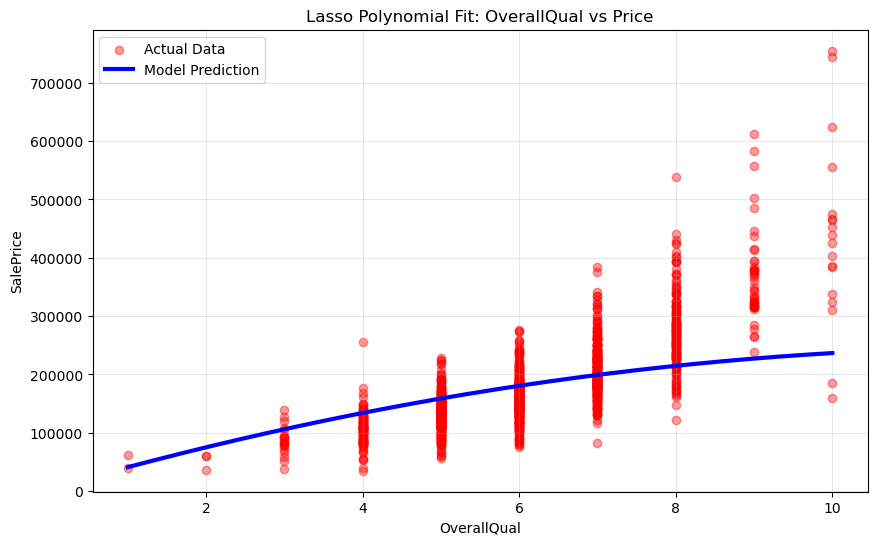

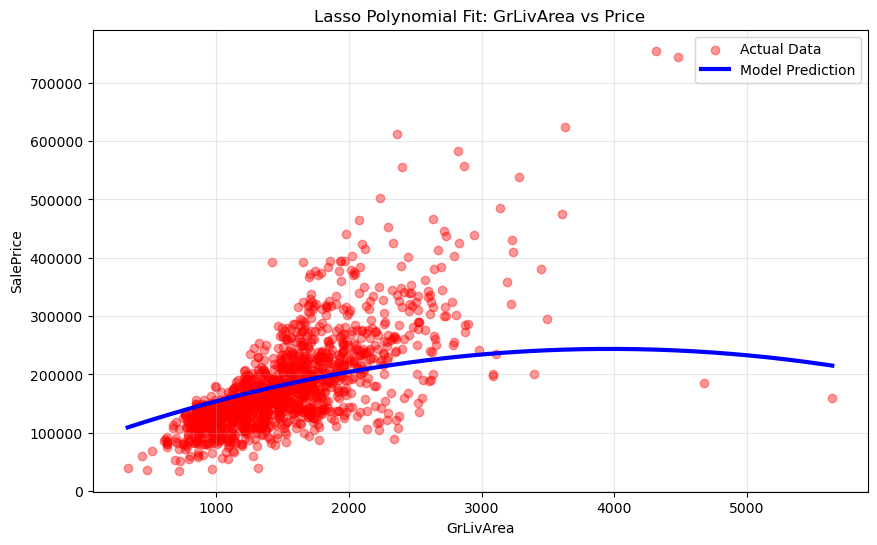

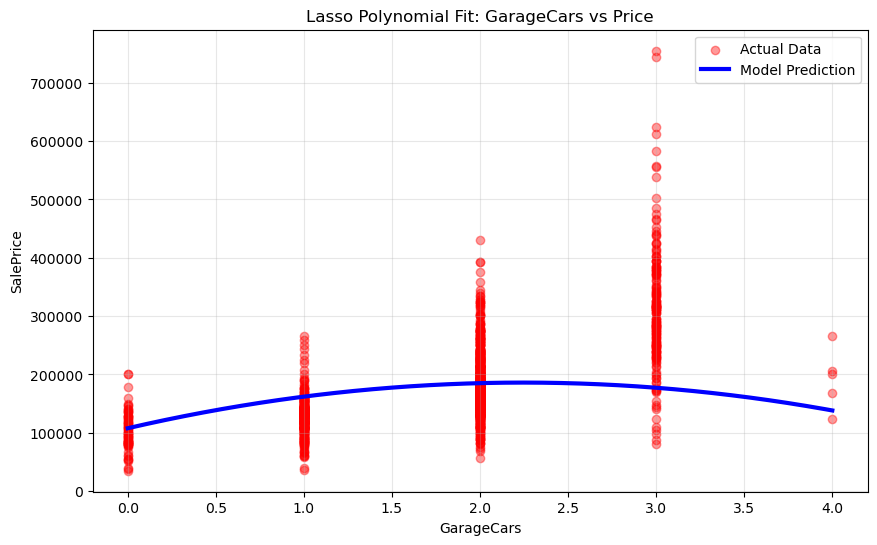

In [235]:
plot_model_curve(X, y, regr, scaler, poly, 'OverallQual')
plot_model_curve(X, y, regr, scaler, poly, 'GrLivArea')
plot_model_curve(X, y, regr, scaler, poly, 'GarageCars')